# Quantum Machine Learning With Canonical Variables

**J. Fuentes** 

[jf [at] ul](mailto:jesus.fuentes@uni.lu)

**Ion-Trap Learning** is a form of quantum machine learning with continuous variables, which skirts qubits for information processing.

The learning algorithm is embedded in the ion trap itself, with the elastic potentials serving as the *ansatze* that map the input $t$ to the output $\Xi(t)=\{x(t),y(t),z(t)\}$.

The image below sketches this very idea in the context of regression, showing the transition from digital or intangible domains to physical devices where the learning algorithm *lives* analogically.

<p style="text-align:center;">
<img src="schematic.png" alt="Ion-Trap Learning" width="900"/>
</p>

Hence, the trajectory described by a given observable $\Xi$ parameterised by $t$ is not predicted by digital or qubit-oriented computations, but by the elastic field supported by the geometry of the confinement device. The code below provides numerical simulations of the implementation of such techniques.

_June, 2024 - Belval, Luxembourg_

## Regression

### IonLearning Modules for Regression.

Import the necessary modules to train the regressor model.

In [1]:
from canonicalRegressor import TrainTestDataHandler
from canonicalRegressor import IonRegression

Select dataset and instantiate the data to get the training and testing subsets.

In [2]:
# File name, if necessary add the entire path
fname = 'data/dataset_r=1.2_s=-1.66667_t=[-3.13659,3.13659]'

# Instantiate the data handler
handler = TrainTestDataHandler(fname + '.csv')

# Get train and test subsets
T_train, X_train, P_train = handler.get_train_data()
T_test, X_test, P_test = handler.get_test_data()

Chose the initial condition in the following format:
$Q_0 = (x_0, p_0)$. In the paper $Q_0 = (1,1)$; all the datasets in the `data` folder were computed with this same initial condition.
However, in the event that any other system is trained, select $Q_0$ in accordance with the target data $\hat{\Xi}_0$.

In [3]:
# Define the initial condition for the QuantumEvolution model
Q0 = [1, 1]

### Instatiante the IonRegression class. 
The bounds are the ranges for the parameters of $\theta_\mathcal{P}(t)$.
They can be manually introduced or automatically taken in case fine-tuning is implemented.
In this example, fine-tuning is not considered and a reasonable range is within $[-3/2,1]$.

The algorithm is then instructed to start optimising using `fit()`, where a number of iterations can be given arbitrarily. The method also gives the option to add early stopping rounds, to avoid the model overfits. By default this number is set at 20. Upon completion, this will have the model trained.

**Notice:** Results may slightly vary each time as Bayesian optimisation is stochastic.

In [4]:
# Instantiate the optimisation class
model = IonRegression(features=T_train, target_function=X_train, initial_conditions=Q0, bounds=[-1.5, 1])

# Fit the field's parameters
model.fit(num_iterations=100, early_stopping=50)

Iteration = 10/100, RMSE = 0.4207
Iteration = 20/100, RMSE = 3.8466
Iteration = 30/100, RMSE = 3.6208
Iteration = 40/100, RMSE = 2.9892
Iteration = 50/100, RMSE = 5.4169
Iteration = 60/100, RMSE = 1.8069
Iteration = 70/100, RMSE = 3.6401
Early stopping at iteration 78, best RMSE = 0.1257


### Plot the results.

To plot the true noiseless trajectories, instruct the model to simulate them assuming the exact parameters are known. 
In this case introduce such parameters `P` in `IonRegression.plot_predictions(T_test, X_test, P=P)`. This is only for reproducibility purposes of the paper.

In practice, these noiseless trajectories may not be exactly known.

In particular, the exact parameters for the dataset `dataset_r=1.2_s=-1.66667_t=[-3.13659,3.13659].csv` are:
\begin{equation*}
a_1=-55/48, a_3=5/96, a_5=-1/480.
\end{equation*}

Training R²: 0.9881, Training RMSE: 0.1257
Testing R²: 0.9851, Testing RMSE: 0.1432


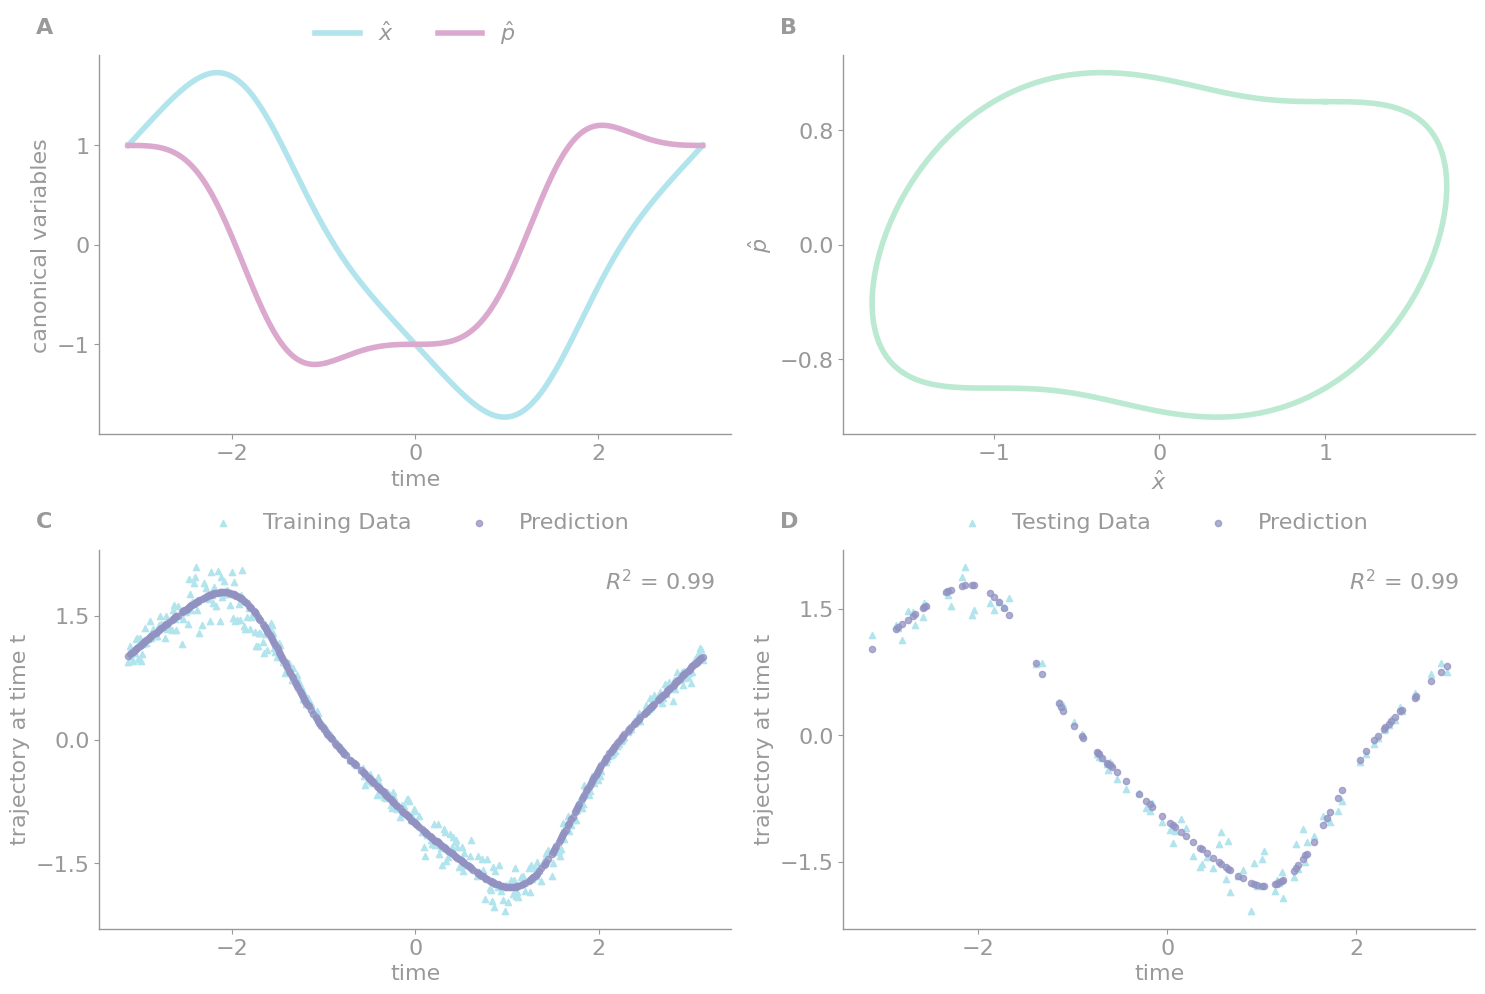

In [5]:
# Introduce the exact parameters to plot the synthetic data
model.plot_predictions(T_test, X_test, P=[-55/48, 5/96, -1/480])

# Binary Classification

### IonLearning Modules for Binary Classification.

Import the necessary modules to train the binary classifier model.

In [6]:
from canonicalClassifier import IonClassifier
from canonicalClassifier import TrainTestDataHandler as ClassifierTrainTestDataHandler

This example uses the same trajectory $x$ already imported for the regression model.
To analyse another dataset, redefine `fname` within `ClassifierTrainTestDataHandler` accordingly.

The data handler class will automatically split this trajectory into two classes using the median as the cutoff, returning _labels_ of $x$ for training and testing the model.

Any other cutoff can be used. If that is the case, modify the `DataHanlder` class in ``canonicalClassifier.py``.

In [7]:
# Instantiate the data handler
handler = ClassifierTrainTestDataHandler(fname + '.csv')

# Get train and test subsets
T_train, X_train, P_train, X_train_labels, P_train_labels = handler.get_train_data()
T_test, X_test, P_test, X_test_labels, P_test_labels = handler.get_test_data()

The initial condition $Q_0$ is identical to that in the regression model, as are the bounds. 
Ensure that these are adjusted appropriately if the model is trained with a different dataset.

This model usually converges faster than the regressor, and only a few iterations are needed for the model to yield accurate predictions.

In [8]:
# Instantiate the optimisation class
model = IonClassifier(features=T_train, target_function=X_train_labels, initial_conditions=Q0, bounds=[-1.5, 1])

# Fit the field's parameters
model.fit(num_iterations=100)

Iteration = 10/100, Score = 0.3099
Iteration = 20/100, Score = 0.2837
Iteration = 30/100, Score = 0.8397
Iteration = 40/100, Score = 2.0357
Early stopping at iteration 40, best Score = 0.2837


### Plot the results.

The output will present predictions for the training and testing sets.
In the paper, only the testing set has been reported, as it is over unseen data that the model truly reflects its generalisability.

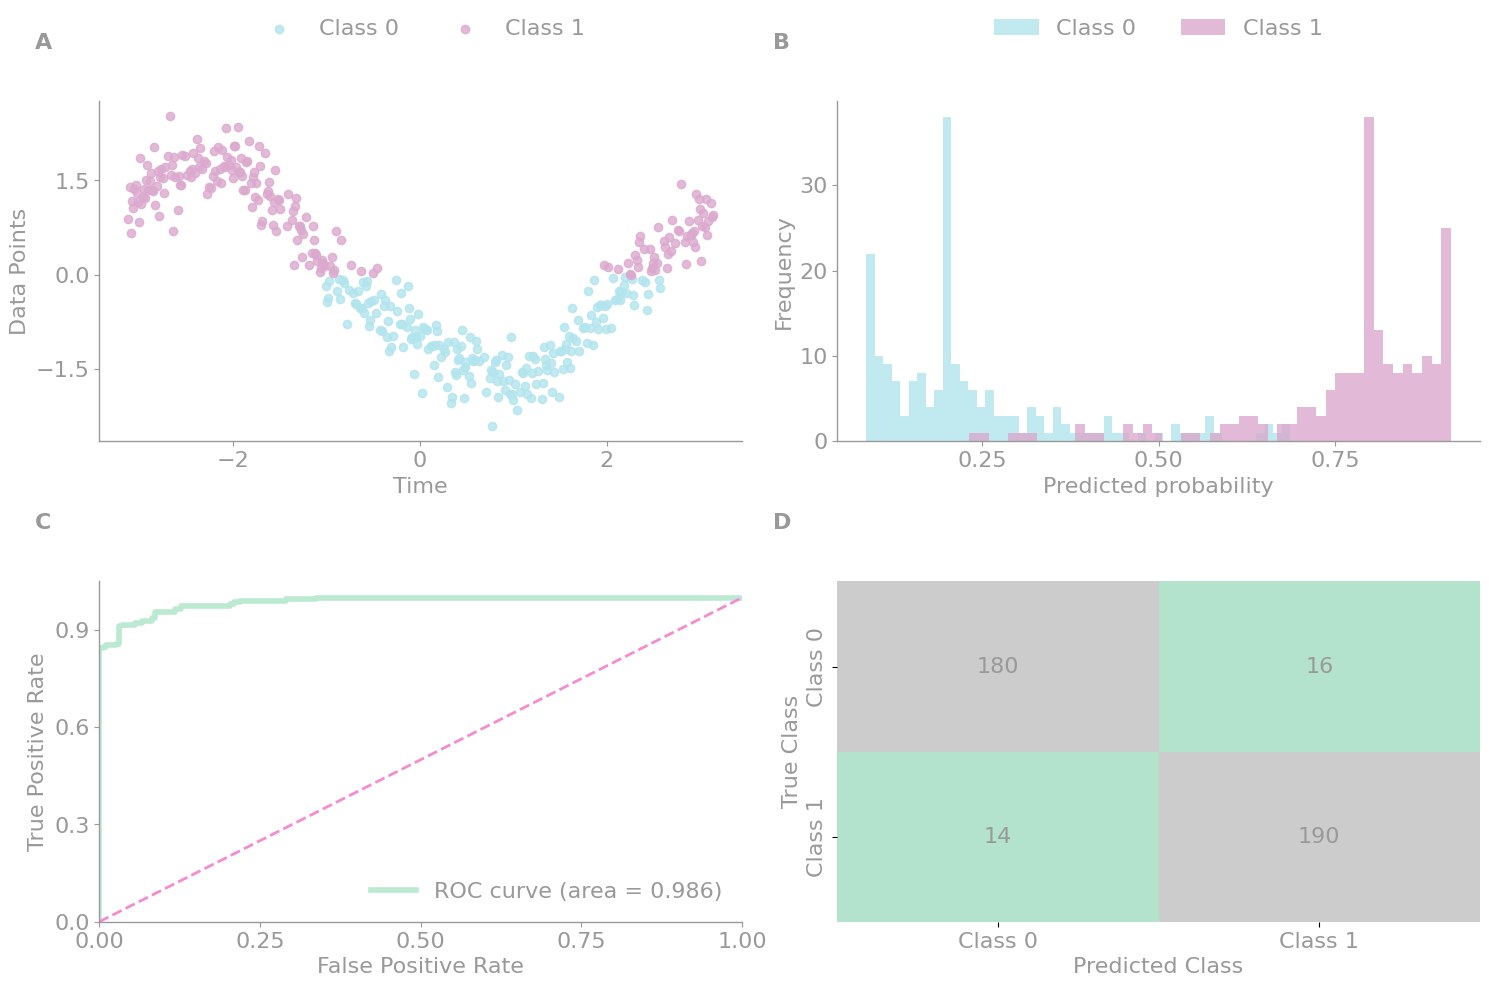

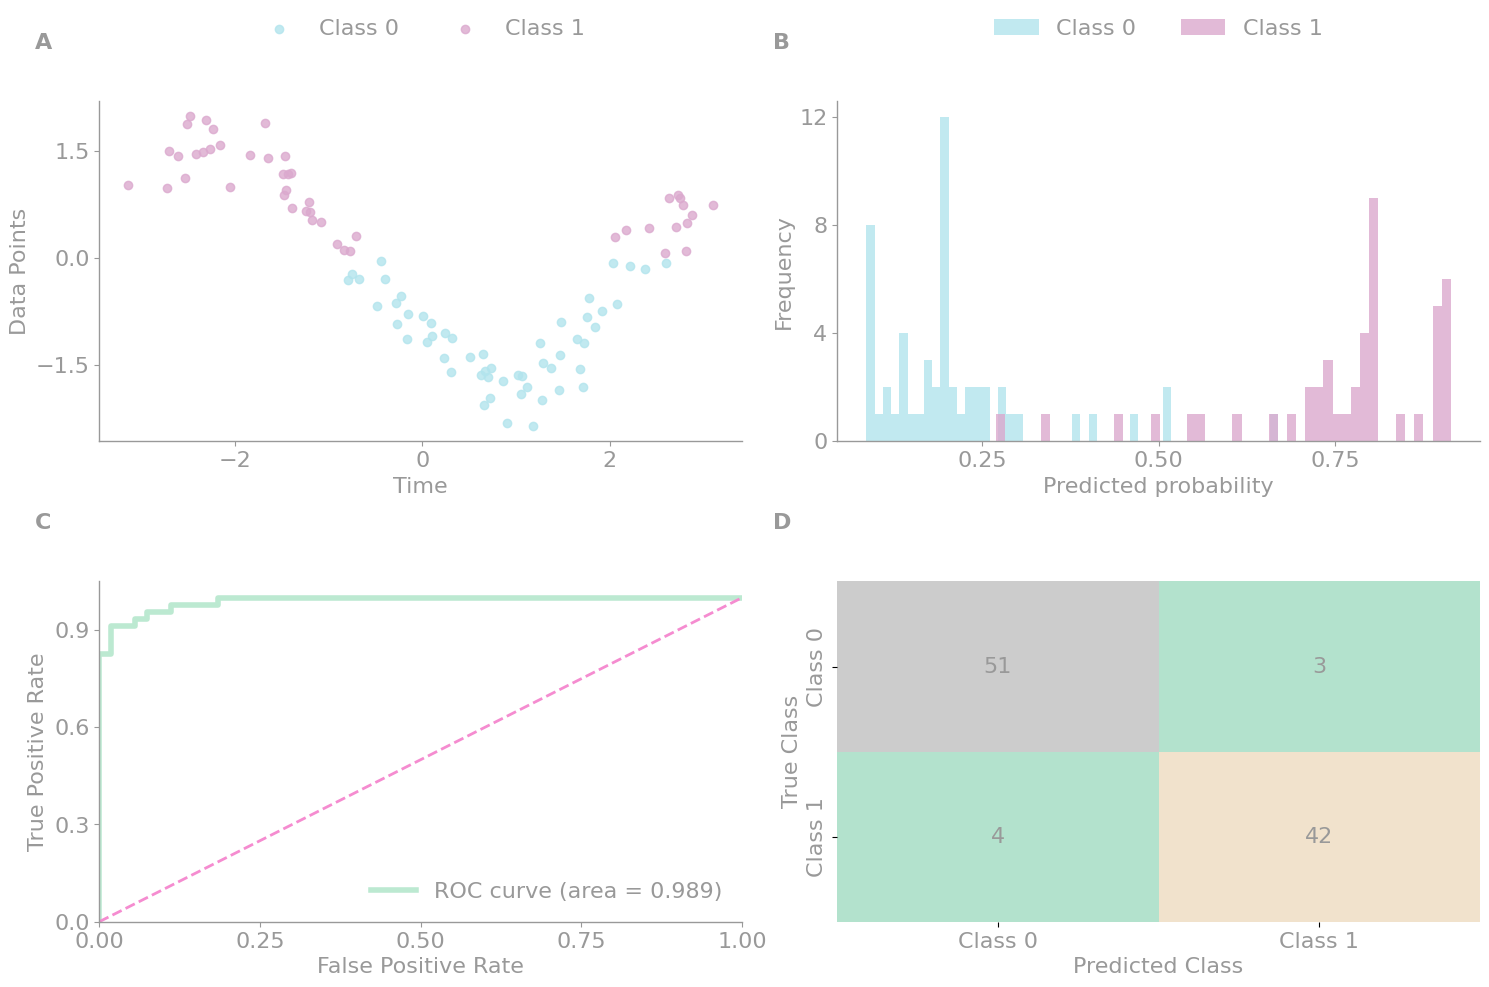

In [9]:
model.plot_predictions(T_test, X_test, X_test_labels, X_train)

# Appendix

### Regression of the probability density.

Not only can the canonical observables $x$ and $p$ be used within this learning scheme. It is also possible to make predictions over $\rho(x,t)$, i.e. the dataset now contains two features. The following code performs regression on $\rho(x,t)$ usign a Gaussian wave packet in the coordinate represetnation. The density function used here corresponds to the trajectory described in the dataset:

 `dataset_r=1.2_s=-1.66667_t=[-3.13659,3.13659].csv`.

### IonLearning modules for Regression of $\rho$.

In [10]:
from densityRegressor import DensityRegression
from densityRegressor import TrainTestDataHandler as densityDataHandler

### Import and Prepare Data.

First, import the dataset and split it into training and testing subsets. This dataset includes two input variables, $x$ and $t$, and one output variable, $\rho(x,t)$, which is two-dimensional.

The data includes 5% noise in the density function to evaluate how well the model generalises.

The file name is characterised by two parameters, indicated by `_r=[value]_s=[value]_`. Thus, file names starting with `dataset_` correspond to files starting with `density_` if both share the same parameters.

Example:

The file examined in this notebook  `dataset_r=1.2_s=-1.66667_t=[-3.13659,3.13659].csv`, contains the time evolution of the canonical observables $x$ and $p$ in the time interval $[-\pi,\pi]$. 

The file `density_r=1.2_s=-1.66667_t=[-3.13659,3.13659]_x=[-4,4].csv`, contains the Gaussian wave packet of the same system, in the same time interval, and in the space domain $[-4,4]$.

In [11]:
# File name, if necessary add the entire path
fname = 'data/density_r=1.2_s=-1.66667_t=[-3.13659,3.13659]_x=[-4,4]'

# Instantiate the data handler
handler = densityDataHandler(fname + '.csv')

# Get train and test subsets
X_train, T_train, R_train = handler.get_train_data()
X_test, T_test, R_test = handler.get_test_data()

The initial condition is the same for all the examples, and datasets in the repository.

In [12]:
Q0 = [1, 1]

### Instantiate the class for Regression.

Let's now instantiate the `DensityRegressor` class. For a faster convergence, the bounds can be selected in the interval $[-3/2, 1/2]$. The early stopping rounds are by default 20.  To account for noise in the density, I used 40 rounds to slightly overfit the training subset and let the model iterate up to 200 times.

In [13]:
# Instantiate the optimisation class
model = DensityRegression(x=X_train, t=T_train, density=R_train, initial_conditions=Q0, bounds=[-1.5, 0.5])

# Fit the model's parameters
model.fit(num_iterations=200, early_stopping=40)

Iteration = 10/200, RMSE = 0.0233
Iteration = 20/200, RMSE = 0.0199
Iteration = 30/200, RMSE = 0.0166
Iteration = 40/200, RMSE = 0.0254
Iteration = 50/200, RMSE = 0.0348
Iteration = 60/200, RMSE = 0.1165
Early stopping at iteration 65, best RMSE = 0.0121


### Plot the results. 

The outcomes will be presented in a grid of $2 \times 2$ subplots. The upper row corresponds to the training set (left panel) and the predictions over it (right panel), while the lower row keeps the same arrangement in the case of the testing subset.

Training R2: 0.9948, Training RMSE: 0.0121
Testing R2: 0.9943, Testing RMSE: 0.0128


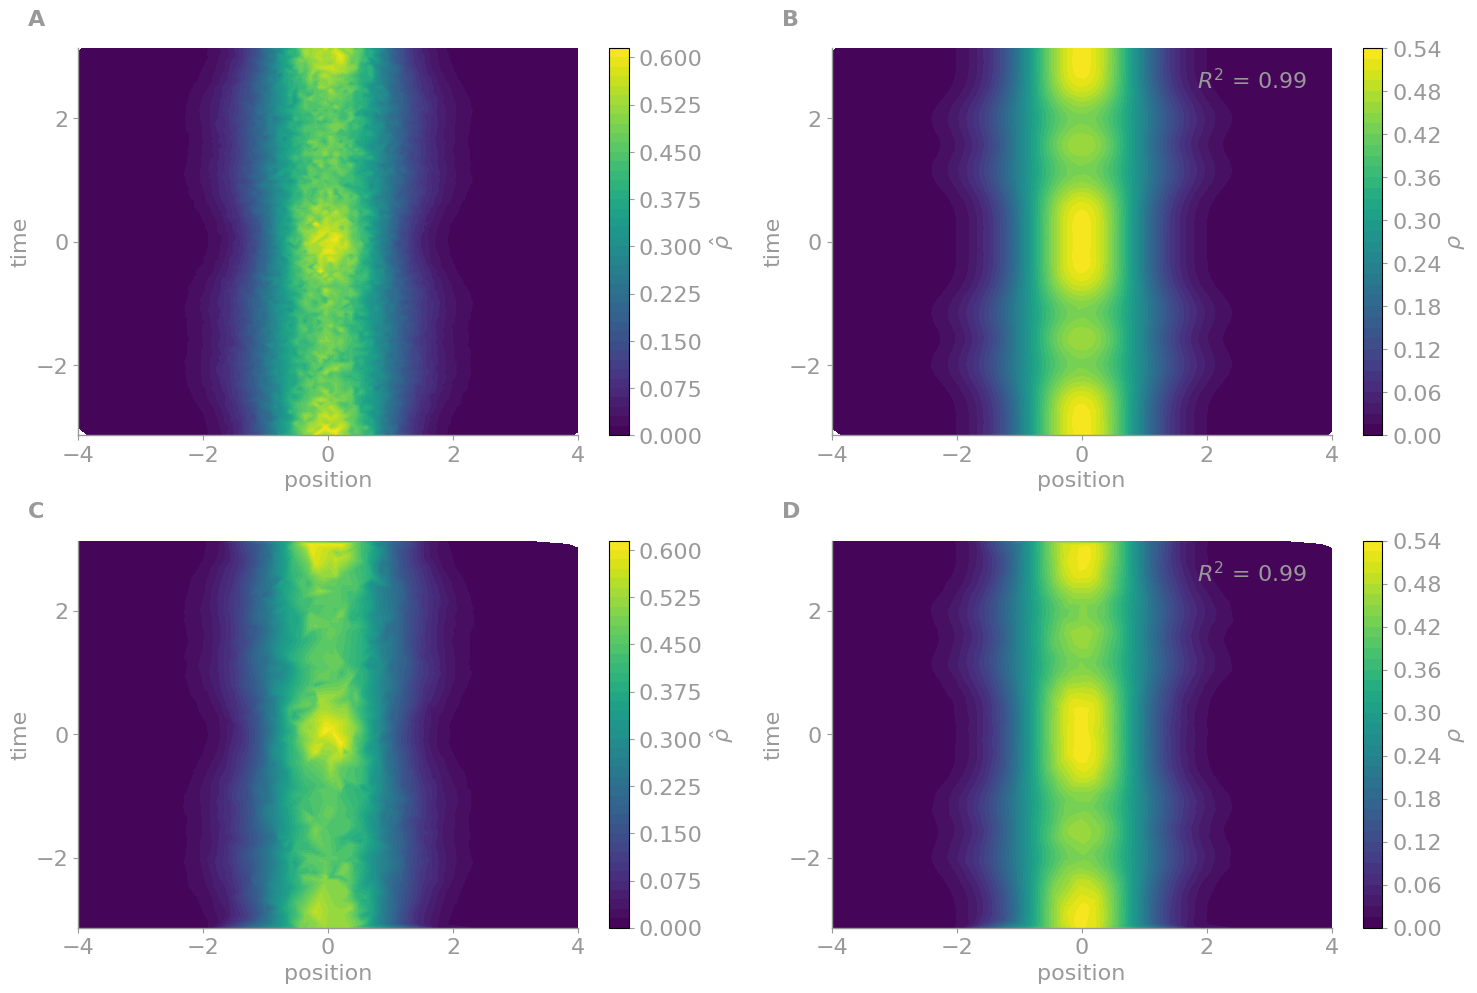

In [14]:
model.plot_predictions(X_test, T_test, R_test)